# MODELOS DE REDES PARA DENGUE LEBRIJA

### Cargue de librerias requeridas

In [1]:
import pandas as pd
import numpy as np
from numpy import concatenate
from pandas import concat
from pandas import read_csv
from pandas import DataFrame
import tensorflow as tf
from tensorflow import keras
import os
import datetime
import IPython
import IPython.display
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten, LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Input, Reshape, RepeatVector, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from scipy.stats import randint as sp_randint
np.random.seed(123) # for reproducibility
import warnings
warnings.filterwarnings('ignore')

### Cargar la base de datos

In [2]:
datos = read_csv('Lebrija_Lags.csv', encoding='latin-1', sep=";")
datos.columns

Index(['Municipio', 'Año', 'Semana_Epi', 'Casos_Dengue',
       'Temp_Seca_Max_Dia_Prom', 'Temp_Seca_Max_Dia_Prom_1',
       'Temp_Seca_Max_Dia_Prom_2', 'Temp_Seca_Max_Dia_Prom_3',
       'Temp_Seca_Max_Dia_Prom_4', 'Temp_Seca_Max_Dia_Prom_5',
       'Temp_Seca_Max_Dia_Prom_6', 'Temp_Seca_Max_Sem', 'Temp_Seca_Max_Sem_1',
       'Temp_Seca_Max_Sem_2', 'Temp_Seca_Max_Sem_3', 'Temp_Seca_Max_Sem_4',
       'Temp_Seca_Max_Sem_5', 'Temp_Seca_Max_Sem_6', 'Temp_Seca_Min_Dia_Prom',
       'Temp_Seca_Min_Dia_Prom_1', 'Temp_Seca_Min_Dia_Prom_2',
       'Temp_Seca_Min_Dia_Prom_3', 'Temp_Seca_Min_Dia_Prom_4',
       'Temp_Seca_Min_Dia_Prom_5', 'Temp_Seca_Min_Dia_Prom_6',
       'Temp_Seca_Min_Sem', 'Temp_Seca_Min_Sem_1', 'Temp_Seca_Min_Sem_2',
       'Temp_Seca_Min_Sem_3', 'Temp_Seca_Min_Sem_4', 'Temp_Seca_Min_Sem_5',
       'Temp_Seca_Min_Sem_6', 'Prom_Dia_Preci', 'Prom_Dia_Preci_1',
       'Prom_Dia_Preci_2', 'Prom_Dia_Preci_3', 'Prom_Dia_Preci_4',
       'Prom_Dia_Preci_5', 'Prom_Dia_Preci_6', '

In [3]:
# Se eliminan las columnas de las variables que No se van a utilizar
datos = datos.drop(['Municipio', 'Año', 'Semana_Epi', 'Temp_Seca_Max_Dia_Prom', 'Temp_Seca_Max_Dia_Prom_1',
                    'Temp_Seca_Max_Dia_Prom_2','Temp_Seca_Max_Dia_Prom_3','Temp_Seca_Max_Dia_Prom_4',
                    'Temp_Seca_Max_Dia_Prom_5','Temp_Seca_Max_Dia_Prom_6','Temp_Seca_Max_Sem', 'Temp_Seca_Max_Sem_1',
                    'Temp_Seca_Max_Sem_2', 'Temp_Seca_Max_Sem_3', 'Temp_Seca_Max_Sem_4','Temp_Seca_Max_Sem_5', 
                    'Temp_Seca_Max_Sem_6', 'Temp_Seca_Min_Dia_Prom','Temp_Seca_Min_Dia_Prom_1', 'Temp_Seca_Min_Dia_Prom_2',
                    'Temp_Seca_Min_Dia_Prom_5','Temp_Seca_Min_Dia_Prom_6',
                    'Temp_Seca_Min_Sem','Temp_Seca_Min_Sem_2','Temp_Seca_Min_Sem_3', 'Temp_Seca_Min_Sem_4',
                    'Temp_Seca_Min_Sem_5', 'Prom_Dia_Preci', 'Prom_Dia_Preci_1','Prom_Dia_Preci_2', 'Prom_Dia_Preci_3',
                    'Prom_Dia_Preci_4','Prom_Dia_Preci_5', 'Prom_Dia_Preci_6', 'Total_Preci_Sem','Total_Preci_Sem_1',
                    'Total_Preci_Sem_2', 'Total_Preci_Sem_3','Total_Preci_Sem_4', 'Total_Preci_Sem_5', 'Total_Preci_Sem_6',
                    'Temp_Max_Dia_Prom', 'Temp_Max_Dia_Prom_1', 'Temp_Max_Dia_Prom_2','Temp_Max_Dia_Prom_3',
                    'Temp_Max_Dia_Prom_4', 'Temp_Max_Dia_Prom_5','Temp_Max_Dia_Prom_6', 'Temp_Max_Sem', 'Temp_Max_Sem_1',
                    'Temp_Max_Sem_2', 'Temp_Max_Sem_3', 'Temp_Max_Sem_4', 'Temp_Max_Sem_5','Temp_Max_Sem_6',
                    'Temp_Min_Dia_Prom', 'Temp_Min_Dia_Prom_1','Temp_Min_Dia_Prom_2', 'Temp_Min_Dia_Prom_3',
                    'Temp_Min_Dia_Prom_4','Temp_Min_Dia_Prom_5', 'Temp_Min_Dia_Prom_6', 'Temp_Min_Sem','Temp_Min_Sem_1',
                    'Temp_Min_Sem_2','Temp_Min_Sem_5', 'Temp_Min_Sem_6','Temp_Seca_Min_Dia_Prom_3', 'Temp_Seca_Min_Dia_Prom_4',
                   'Temp_Seca_Min_Sem_1','Temp_Seca_Min_Sem_6'],axis=1)
datos.columns

Index(['Casos_Dengue', 'Temp_Min_Sem_3', 'Temp_Min_Sem_4'], dtype='object')

In [4]:
#Se verifican datos nulos o faltantes
datos.isnull().sum()

Casos_Dengue      0
Temp_Min_Sem_3    0
Temp_Min_Sem_4    0
dtype: int64

### División de los datos en set de entrenamiento y prueba

In [5]:
train_size = int(len(datos) * 0.75)
test_size = len(datos) - train_size
train, test = datos.iloc[0:train_size], datos.iloc[train_size:len(datos)]
print(len(train), len(test))

312 104


In [6]:
f_columns = ['Temp_Min_Sem_3', 'Temp_Min_Sem_4']
f_transformer = MinMaxScaler(feature_range=(0, 1))
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())

In [7]:
dengue_transformer = MinMaxScaler(feature_range=(0, 1))
dengue_transformer = dengue_transformer.fit(train[['Casos_Dengue']])
train['Casos_Dengue'] = dengue_transformer.transform(train[['Casos_Dengue']])
test['Casos_Dengue'] = dengue_transformer.transform(test[['Casos_Dengue']])

In [8]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# MODELO LSTM

In [9]:
# Creación de X_train, y_train, X_test y y_test Para el modelo LSTM

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_LSTM, y_train_LSTM = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_LSTM, y_test_LSTM = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_LSTM.shape, y_train_LSTM.shape, X_test_LSTM.shape, y_test_LSTM.shape )

(305, 7, 3) (305,) (97, 7, 3) (97,)


### Construcción, Compilación y entrenamiento del modelo LSTM

In [10]:
Lebri_LSTM_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Lebri_LSTM_model_1.add(keras.layers.InputLayer(input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    
    
#CAPAS INTERMEDIAS

Lebri_LSTM_model_1.add(keras.layers.LSTM(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_LSTM_model_1.add(keras.layers.LSTM(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_LSTM_model_1.add(keras.layers.LSTM(units=100,
                            activation="tanh",
                            #return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))
        
#CAPA DE SALIDA
Lebri_LSTM_model_1.add(keras.layers.Dense(1, activation="linear"))
    

#COMPILACIÓN DEL MODELO
Lebri_LSTM_model_1.compile(optimizer="adam", loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Lebri_LSTM_model_3.h5'
checkpoint_LSTM = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_LSTM = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_LSTM = Lebri_LSTM_model_1.fit(X_train_LSTM,y_train_LSTM, validation_data=(X_test_LSTM,y_test_LSTM), 
                                     verbose=2, epochs=100, callbacks=[monitor_LSTM, checkpoint_LSTM])
Lebri_LSTM_model_1.load_weights(model_filepath)

Epoch 1/100
10/10 - 12s - loss: 0.0871 - mse: 0.0871 - val_loss: 0.8468 - val_mse: 0.8468 - 12s/epoch - 1s/step
Epoch 2/100
10/10 - 0s - loss: 0.0621 - mse: 0.0621 - val_loss: 1.0776 - val_mse: 1.0776 - 428ms/epoch - 43ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0534 - mse: 0.0534 - val_loss: 0.6945 - val_mse: 0.6945 - 469ms/epoch - 47ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0561 - mse: 0.0561 - val_loss: 0.6789 - val_mse: 0.6789 - 488ms/epoch - 49ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0505 - mse: 0.0505 - val_loss: 0.5772 - val_mse: 0.5772 - 411ms/epoch - 41ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0525 - mse: 0.0525 - val_loss: 0.6454 - val_mse: 0.6454 - 328ms/epoch - 33ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0503 - mse: 0.0503 - val_loss: 0.4539 - val_mse: 0.4539 - 372ms/epoch - 37ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0544 - mse: 0.0544 - val_loss: 0.8169 - val_mse: 0.8169 - 250ms/epoch - 25ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0539 - mse: 0.0539 - val_loss: 0.6496 - val_mse: 0

# MODELO CNN

In [11]:
# Creación de X_train, y_train, X_test y y_test Para el modelo CNN

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_CNN, y_train_CNN = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_CNN, y_test_CNN = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_CNN.shape, y_train_CNN.shape, X_test_CNN.shape, y_test_CNN.shape )

(305, 7, 3) (305,) (97, 7, 3) (97,)


### Construcción, Compilación y entrenamiento del modelo CNN

In [12]:
Lebri_CNN_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Lebri_CNN_model_1.add(keras.layers.InputLayer(input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2])))
    
    
#CAPAS INTERMEDIAS

Lebri_CNN_model_1.add(keras.layers.Conv1D(80, kernel_size=2, strides=1, activation='linear', padding='same'))
Lebri_CNN_model_1.add(keras.layers.MaxPooling1D(pool_size=2, padding='same'))

Lebri_CNN_model_1.add(keras.layers.Conv1D(80, kernel_size=2, strides=1, activation='linear', padding='same'))
Lebri_CNN_model_1.add(keras.layers.MaxPooling1D(pool_size=2, padding='same'))

Lebri_CNN_model_1.add(keras.layers.Conv1D(80, kernel_size=2, strides=1, activation='linear', padding='same'))
Lebri_CNN_model_1.add(keras.layers.MaxPooling1D(pool_size=2, padding='same'))

Lebri_CNN_model_1.add(Dropout(0.5))
Lebri_CNN_model_1.add(Flatten())
    
Lebri_CNN_model_1.add(keras.layers.Dense(units=256, activation='linear'))
Lebri_CNN_model_1.add(Dropout(0.5)) 


#CAPA DE SALIDA                 
Lebri_CNN_model_1.add(Dense(1))


#COMPILACIÓN DEL MODELO
Lebri_CNN_model_1.compile(optimizer='rmsprop', loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Lebri_CNN_model_3.h5'
checkpoint_CNN = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_CNN = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_CNN = Lebri_CNN_model_1.fit(X_train_CNN,y_train_CNN, validation_data=(X_test_CNN,y_test_CNN), 
                                     verbose=2, epochs=100, callbacks=[monitor_CNN, checkpoint_CNN])
Lebri_CNN_model_1.load_weights(model_filepath)

Epoch 1/100
10/10 - 2s - loss: 0.0942 - mse: 0.0942 - val_loss: 0.6592 - val_mse: 0.6592 - 2s/epoch - 164ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0545 - mse: 0.0545 - val_loss: 0.3137 - val_mse: 0.3137 - 173ms/epoch - 17ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0556 - mse: 0.0556 - val_loss: 0.4616 - val_mse: 0.4616 - 161ms/epoch - 16ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0535 - mse: 0.0535 - val_loss: 0.4198 - val_mse: 0.4198 - 109ms/epoch - 11ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0496 - mse: 0.0496 - val_loss: 0.3933 - val_mse: 0.3933 - 97ms/epoch - 10ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0500 - mse: 0.0500 - val_loss: 0.3986 - val_mse: 0.3986 - 94ms/epoch - 9ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0511 - mse: 0.0511 - val_loss: 0.4776 - val_mse: 0.4776 - 98ms/epoch - 10ms/step


# MODELO RNN

In [13]:
# Creación de X_train, y_train, X_test y y_test Para el modelo RNN

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_RNN, y_train_RNN = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_RNN, y_test_RNN = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_RNN.shape, y_train_RNN.shape, X_test_RNN.shape, y_test_RNN.shape )

(305, 7, 3) (305,) (97, 7, 3) (97,)


### Construcción, Compilación y entrenamiento del modelo RNN

In [14]:
Lebri_RNN_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Lebri_RNN_model_1.add(keras.layers.InputLayer(input_shape=(X_train_RNN.shape[1], X_train_RNN.shape[2])))
    
    
#CAPAS INTERMEDIAS

Lebri_RNN_model_1.add(keras.layers.SimpleRNN(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_RNN_model_1.add(keras.layers.SimpleRNN(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_RNN_model_1.add(keras.layers.SimpleRNN(units=100,
                            activation="tanh",
                            #return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))
        
#CAPA DE SALIDA
Lebri_RNN_model_1.add(keras.layers.Dense(1, activation="linear"))
    

#COMPILACIÓN DEL MODELO
Lebri_RNN_model_1.compile(optimizer="adam", loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Lebri_RNN_model_3.h5'
checkpoint_RNN = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_RNN = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_RNN = Lebri_RNN_model_1.fit(X_train_RNN,y_train_RNN, validation_data=(X_test_RNN,y_test_RNN), 
                                     verbose=2, epochs=100, callbacks=[monitor_RNN, checkpoint_RNN])
Lebri_RNN_model_1.load_weights(model_filepath)

Epoch 1/100
10/10 - 5s - loss: 0.0894 - mse: 0.0894 - val_loss: 0.9013 - val_mse: 0.9013 - 5s/epoch - 543ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0644 - mse: 0.0644 - val_loss: 0.9747 - val_mse: 0.9747 - 156ms/epoch - 16ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0619 - mse: 0.0619 - val_loss: 0.8444 - val_mse: 0.8444 - 203ms/epoch - 20ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0557 - mse: 0.0557 - val_loss: 0.5721 - val_mse: 0.5721 - 219ms/epoch - 22ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0558 - mse: 0.0558 - val_loss: 0.5875 - val_mse: 0.5875 - 156ms/epoch - 16ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0555 - mse: 0.0555 - val_loss: 0.6894 - val_mse: 0.6894 - 156ms/epoch - 16ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0566 - mse: 0.0566 - val_loss: 0.6982 - val_mse: 0.6982 - 141ms/epoch - 14ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0553 - mse: 0.0553 - val_loss: 0.5889 - val_mse: 0.5889 - 156ms/epoch - 16ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0573 - mse: 0.0573 - val_loss: 0.5115 - val_mse: 

# MODELO GRU

In [15]:
# Creación de X_train, y_train, X_test y y_test Para el modelo GRU

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_GRU, y_train_GRU = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_GRU, y_test_GRU = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_GRU.shape, y_train_GRU.shape, X_test_GRU.shape, y_test_GRU.shape )

(305, 7, 3) (305,) (97, 7, 3) (97,)


### Construcción, Compilación y entrenamiento del modelo GRU

In [16]:
Lebri_GRU_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Lebri_GRU_model_1.add(keras.layers.InputLayer(input_shape=(X_train_GRU.shape[1], X_train_GRU.shape[2])))
    
    
#CAPAS INTERMEDIAS

Lebri_GRU_model_1.add(keras.layers.GRU(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_GRU_model_1.add(keras.layers.GRU(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_GRU_model_1.add(keras.layers.GRU(units=100,
                            activation="tanh",
                            #return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))
        
#CAPA DE SALIDA
Lebri_GRU_model_1.add(keras.layers.Dense(1, activation="linear"))
    

#COMPILACIÓN DEL MODELO
Lebri_GRU_model_1.compile(optimizer="adam", loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Lebri_GRU_model_3.h5'
checkpoint_GRU = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_GRU = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_GRU = Lebri_GRU_model_1.fit(X_train_GRU,y_train_GRU, validation_data=(X_test_GRU,y_test_GRU), 
                                     verbose=2, epochs=100, callbacks=[monitor_GRU, checkpoint_GRU])
Lebri_GRU_model_1.load_weights(model_filepath)

Epoch 1/100
10/10 - 11s - loss: 0.0876 - mse: 0.0876 - val_loss: 1.0790 - val_mse: 1.0790 - 11s/epoch - 1s/step
Epoch 2/100
10/10 - 0s - loss: 0.0616 - mse: 0.0616 - val_loss: 1.0578 - val_mse: 1.0578 - 391ms/epoch - 39ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0548 - mse: 0.0548 - val_loss: 0.8196 - val_mse: 0.8196 - 366ms/epoch - 37ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0541 - mse: 0.0541 - val_loss: 0.5948 - val_mse: 0.5948 - 367ms/epoch - 37ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0563 - mse: 0.0563 - val_loss: 0.7824 - val_mse: 0.7824 - 282ms/epoch - 28ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0526 - mse: 0.0526 - val_loss: 0.6024 - val_mse: 0.6024 - 285ms/epoch - 28ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0515 - mse: 0.0515 - val_loss: 0.6762 - val_mse: 0.6762 - 345ms/epoch - 34ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0491 - mse: 0.0491 - val_loss: 0.5120 - val_mse: 0.5120 - 368ms/epoch - 37ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0535 - mse: 0.0535 - val_loss: 0.6115 - val_mse: 0

### Graficas de función de pérdida & RMSE

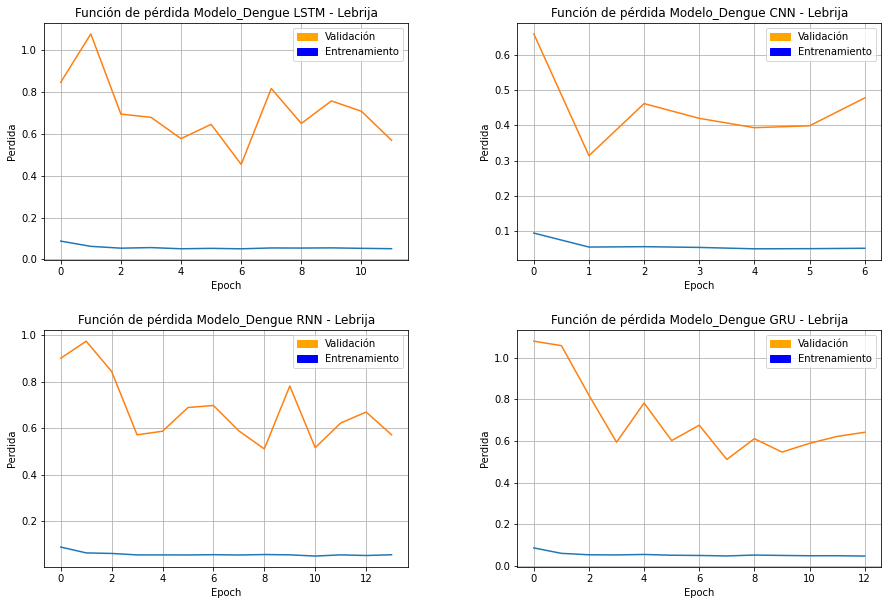

In [17]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 2, 1)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue LSTM - Lebrija')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])

plt.subplot(2, 2, 2)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue CNN - Lebrija')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])

plt.subplot(2, 2, 3)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue RNN - Lebrija')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])

plt.subplot(2, 2, 4)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue GRU - Lebrija')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])

plt.show()

# Gráficas de dispersión

4/4 [==============================] - 2s 9ms/step


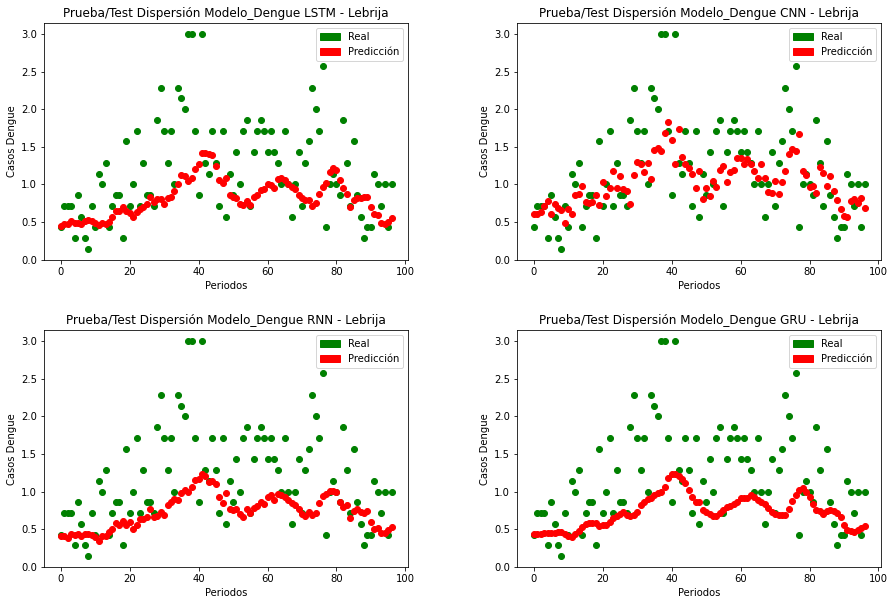

In [18]:
results_LSTM =Lebri_LSTM_model_1.predict(X_test_LSTM)
results_CNN =Lebri_CNN_model_1.predict(X_test_CNN)
results_RNN =Lebri_RNN_model_1.predict(X_test_RNN)
results_GRU =Lebri_GRU_model_1.predict(X_test_GRU)

plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 2, 1)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue LSTM - Lebrija')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_LSTM)),y_test_LSTM,c='g')
plt.scatter(range(len(results_LSTM)),results_LSTM,c='r')

plt.subplot(2, 2, 2)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue CNN - Lebrija')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_CNN)),y_test_CNN,c='g')
plt.scatter(range(len(results_CNN)),results_CNN,c='r')

plt.subplot(2, 2, 3)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue RNN - Lebrija')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_RNN)),y_test_RNN,c='g')
plt.scatter(range(len(results_RNN)),results_RNN,c='r')

plt.subplot(2, 2, 4)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue GRU - Lebrija')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_GRU)),y_test_GRU,c='g')
plt.scatter(range(len(results_GRU)),results_GRU,c='r')

plt.show()

In [19]:
y_pred_LSTM = Lebri_LSTM_model_1.predict(X_test_LSTM)
y_pred_CNN = Lebri_CNN_model_1.predict(X_test_CNN)
y_pred_RNN = Lebri_RNN_model_1.predict(X_test_RNN)
y_pred_GRU = Lebri_GRU_model_1.predict(X_test_GRU)

y_train_inv_LSTM = dengue_transformer.inverse_transform(y_train_LSTM.reshape(1, -1))
y_train_inv_CNN = dengue_transformer.inverse_transform(y_train_CNN.reshape(1, -1))
y_train_inv_RNN = dengue_transformer.inverse_transform(y_train_RNN.reshape(1, -1))
y_train_inv_GRU = dengue_transformer.inverse_transform(y_train_GRU.reshape(1, -1))

y_test_inv_LSTM = dengue_transformer.inverse_transform(y_test_LSTM.reshape(1, -1))
y_test_inv_CNN = dengue_transformer.inverse_transform(y_test_CNN.reshape(1, -1))
y_test_inv_RNN = dengue_transformer.inverse_transform(y_test_RNN.reshape(1, -1))
y_test_inv_GRU = dengue_transformer.inverse_transform(y_test_GRU.reshape(1, -1))

y_pred_inv_LSTM = dengue_transformer.inverse_transform(y_pred_LSTM)
y_pred_inv_CNN = dengue_transformer.inverse_transform(y_pred_CNN)
y_pred_inv_RNN = dengue_transformer.inverse_transform(y_pred_RNN)
y_pred_inv_GRU = dengue_transformer.inverse_transform(y_pred_GRU)

4/4 [==============================] - 0s 5ms/step


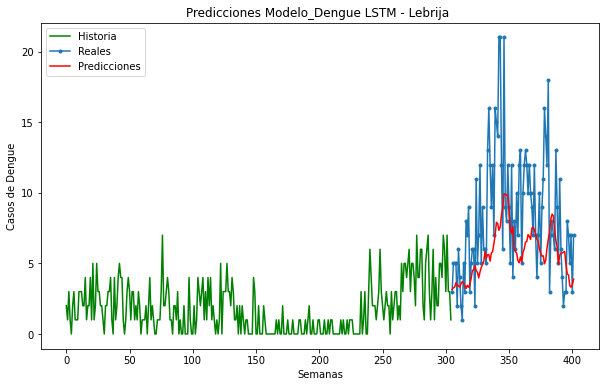

In [20]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_LSTM)), y_train_inv_LSTM.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_LSTM), len(y_train_LSTM) + len(y_test_LSTM)), y_test_inv_LSTM.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_LSTM), len(y_train_LSTM) + len(y_test_LSTM)), y_pred_inv_LSTM.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue LSTM - Lebrija ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

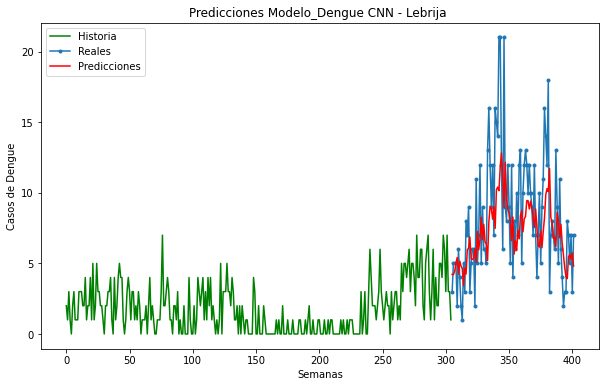

In [21]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_CNN)), y_train_inv_CNN.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_CNN), len(y_train_CNN) + len(y_test_CNN)), y_test_inv_CNN.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_CNN), len(y_train_CNN) + len(y_test_CNN)), y_pred_inv_CNN.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue CNN - Lebrija ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

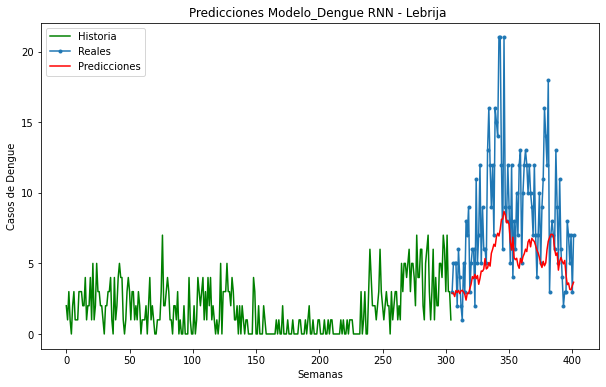

In [22]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_RNN)), y_train_inv_RNN.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_RNN), len(y_train_RNN) + len(y_test_RNN)), y_test_inv_RNN.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_RNN), len(y_train_RNN) + len(y_test_RNN)), y_pred_inv_RNN.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue RNN - Lebrija ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

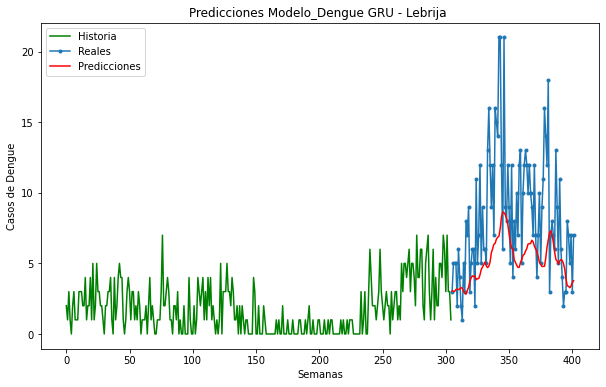

In [23]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_GRU)), y_train_inv_GRU.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_GRU), len(y_train_GRU) + len(y_test_GRU)), y_test_inv_GRU.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_GRU), len(y_train_GRU) + len(y_test_GRU)), y_pred_inv_GRU.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue GRU - Lebrija ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

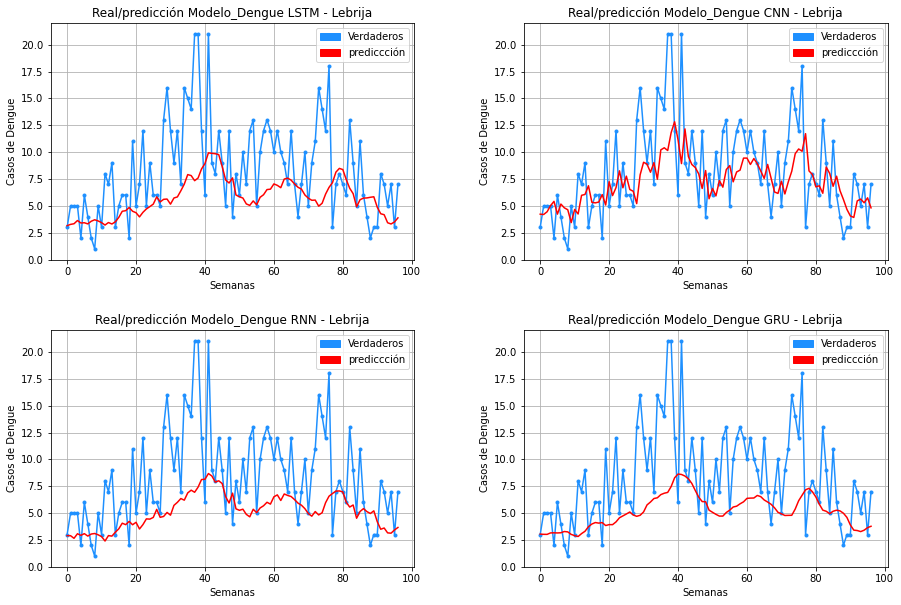

In [24]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 2, 1)
plt.title('Real/predicción Modelo_Dengue LSTM - Lebrija' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_LSTM.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_LSTM.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.title('Real/predicción Modelo_Dengue CNN - Lebrija' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_CNN.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_CNN.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.title('Real/predicción Modelo_Dengue RNN - Lebrija' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_RNN.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_RNN.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.title('Real/predicción Modelo_Dengue GRU - Lebrija' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_GRU.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_GRU.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.show()

In [25]:
score_LSTM = np.sqrt(metrics.mean_squared_error(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
score_CNN = np.sqrt(metrics.mean_squared_error(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
score_RNN = np.sqrt(metrics.mean_squared_error(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
score_GRU = np.sqrt(metrics.mean_squared_error(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

print("RMSE Modelo LSTM Dengue Lebrija : {}".format(score_LSTM))
print("RMSE Modelo CNN Dengue Lebrija  : {}".format(score_CNN))
print("RMSE Modelo RNN Dengue Lebrija  : {}".format(score_RNN))
print("RMSE Modelo GRU Dengue Lebrija  : {}".format(score_GRU))

RMSE Modelo LSTM Dengue Lebrija : 4.716144745113242
RMSE Modelo CNN Dengue Lebrija  : 3.920841443073574
RMSE Modelo RNN Dengue Lebrija  : 5.006539838624907
RMSE Modelo GRU Dengue Lebrija  : 5.008912817199766


In [26]:
print("MSE Modelo LSTM Dengue Lebrija  = ", mean_squared_error(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
print("MSE Modelo CNN Dengue Lebrija   = ", mean_squared_error(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
print("MSE Modelo RNN Dengue Lebrija   = ", mean_squared_error(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
print("MSE Modelo GRU Dengue Lebrija  = ", mean_squared_error(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

MSE Modelo LSTM Dengue Lebrija  =  22.24202125685925
MSE Modelo CNN Dengue Lebrija   =  15.372997621723266
MSE Modelo RNN Dengue Lebrija   =  25.065441155738313
MSE Modelo GRU Dengue Lebrija  =  25.0892076103081


In [27]:
print("MAE Modelo LSTM Dengue Lebrija = ", mean_absolute_error(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
print("MAE Modelo CNN Dengue Lebrija = ", mean_absolute_error(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
print("MAE Modelo RNN Dengue Lebrija = ", mean_absolute_error(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
print("MAE Modelo GRU Dengue Lebrija = ", mean_absolute_error(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

MAE Modelo LSTM Dengue Lebrija =  3.551776522213651
MAE Modelo CNN Dengue Lebrija =  3.0398388990421883
MAE Modelo RNN Dengue Lebrija =  3.7584140571122315
MAE Modelo GRU Dengue Lebrija =  3.770783542357769


In [28]:
print("r2_score Modelo LSTM Dengue Lebrija  = ", r2_score(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
print("r2_score Modelo CNN Dengue Lebrija  = ", r2_score(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
print("r2_score Modelo RNN Dengue Lebrija  = ", r2_score(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
print("r2_score Modelo GRU Dengue Lebrija  = ", r2_score(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

r2_score Modelo LSTM Dengue Lebrija  =  -0.1658004924784342
r2_score Modelo CNN Dengue Lebrija  =  0.19423473292707882
r2_score Modelo RNN Dengue Lebrija  =  -0.3137881358034105
r2_score Modelo GRU Dengue Lebrija  =  -0.315033838436366


In [29]:
print("explained_variance_score Modelo LSTM Dengue Lebrija  = ", explained_variance_score(y_test_inv_LSTM.flatten(), 
                                                                                           y_pred_inv_LSTM.flatten()))
print("explained_variance_score Modelo CNN Dengue Lebrija  = ", explained_variance_score(y_test_inv_CNN.flatten(), 
                                                                                           y_pred_inv_CNN.flatten()))
print("explained_variance_score Modelo RNN Dengue Lebrija = ", explained_variance_score(y_test_inv_RNN.flatten(), 
                                                                                           y_pred_inv_RNN.flatten()))
print("explained_variance_score Modelo GRU Dengue Lebrija  = ", explained_variance_score(y_test_inv_GRU.flatten(), 
                                                                                           y_test_inv_GRU.flatten()))

explained_variance_score Modelo LSTM Dengue Lebrija  =  0.19417934205937737
explained_variance_score Modelo CNN Dengue Lebrija  =  0.2610331927350954
explained_variance_score Modelo RNN Dengue Lebrija =  0.22469928662471927
explained_variance_score Modelo GRU Dengue Lebrija  =  1.0


### VISUALIZACIÓN DE LOS VALORES TESTEADOS VS LAS PREDICCIONES

In [30]:
#MODELO LSTM
resultados_LSTM = pd.DataFrame({ 'Actuales':y_test_inv_LSTM.flatten(), 'Predicciones': y_pred_inv_LSTM.flatten()})
resultados_LSTM['diferencia'] = resultados_LSTM['Predicciones'] - resultados_LSTM['Actuales']
print(resultados_LSTM.head(5))
print(resultados_LSTM.tail(5))

   Actuales  Predicciones  diferencia
0       3.0      3.156968    0.156968
1       5.0      3.273879   -1.726121
2       5.0      3.332457   -1.667543
3       5.0      3.631542   -1.368458
4       2.0      3.402861    1.402861
    Actuales  Predicciones  diferencia
92       7.0      4.172996   -2.827004
93       5.0      3.425909   -1.574091
94       7.0      3.310966   -3.689034
95       3.0      3.498487    0.498487
96       7.0      3.879860   -3.120140


In [31]:
#MODELO CNN
resultados_CNN = pd.DataFrame({ 'Actuales':y_test_inv_CNN.flatten(), 'Predicciones': y_pred_inv_CNN.flatten()})
resultados_CNN['diferencia'] = resultados_CNN['Predicciones'] - resultados_CNN['Actuales']
print(resultados_CNN.head(5))
print(resultados_CNN.tail(5))

   Actuales  Predicciones  diferencia
0       3.0      4.222988    1.222988
1       5.0      4.193913   -0.806087
2       5.0      4.447471   -0.552529
3       5.0      5.014487    0.014487
4       2.0      5.416732    3.416732
    Actuales  Predicciones  diferencia
92       7.0      5.460021   -1.539979
93       5.0      5.629758    0.629758
94       7.0      5.283345   -1.716655
95       3.0      5.743841    2.743841
96       7.0      4.811076   -2.188924


In [32]:
#MODELO RNN
resultados_RNN = pd.DataFrame({ 'Actuales':y_test_inv_RNN.flatten(), 'Predicciones': y_pred_inv_RNN.flatten()})
resultados_RNN['diferencia'] = resultados_RNN['Predicciones'] - resultados_RNN['Actuales']
print(resultados_RNN.head(5))
print(resultados_RNN.tail(5))

   Actuales  Predicciones  diferencia
0       3.0      2.901980   -0.098020
1       5.0      2.894339   -2.105661
2       5.0      2.651871   -2.348129
3       5.0      3.075579   -1.924421
4       2.0      2.930574    0.930574
    Actuales  Predicciones  diferencia
92       7.0      3.610385   -3.389615
93       5.0      3.158656   -1.841344
94       7.0      3.127891   -3.872109
95       3.0      3.430016    0.430016
96       7.0      3.661418   -3.338582


In [33]:
#MODELO GRU
resultados_GRU = pd.DataFrame({ 'Actuales':y_test_inv_GRU.flatten(), 'Predicciones': y_pred_inv_GRU.flatten()})
resultados_GRU['diferencia'] = resultados_GRU['Predicciones'] - resultados_GRU['Actuales']
print(resultados_GRU.head(5))
print(resultados_GRU.tail(5))

   Actuales  Predicciones  diferencia
0       3.0      3.044394    0.044394
1       5.0      3.021798   -1.978202
2       5.0      3.018324   -1.981676
3       5.0      3.154721   -1.845279
4       2.0      3.163220    1.163220
    Actuales  Predicciones  diferencia
92       7.0      3.376027   -3.623973
93       5.0      3.277333   -1.722667
94       7.0      3.406821   -3.593179
95       3.0      3.645339    0.645339
96       7.0      3.772898   -3.227102
